In [82]:
import numpy as np

code_dist = 5
error_div = 1

truth = []
with open(f'al/scores/ar_{code_dist}_{error_div}.txt', 'r') as f:
	lines = f.readlines()
	for line in lines:
		truth.append(line.strip())
truth = np.array([int(x) for x in truth])

AL_preds = []
with open(f'al/scores/pr_{code_dist}_{error_div}.txt', 'r') as f:
	lines = f.readlines()
	for line in lines:
		AL_preds.append(line.strip())
AL_preds = np.array([int(x) for x in AL_preds])

NN_preds = []
with open(f'nn/scores/pr_{code_dist}_{error_div}.txt', 'r') as f:
	lines = f.readlines()
	for line in lines:
		NN_preds.append(line.strip())
NN_preds = np.array([int(x) for x in NN_preds])

GC_preds = []
with open(f'gc/scores/pr_{code_dist}_{error_div}.txt', 'r') as f:
	lines = f.readlines()
	for line in lines:
		GC_preds.append(line.strip())
GC_preds = np.array([int(x) for x in GC_preds])


In [83]:
for thing in [AL_preds, NN_preds, GC_preds]:
    print(thing.shape)

(10000,)
(10000,)
(10000,)


## McNemar's

[5.837391644679784e-30, 3.2953365780915903e-22, 6.533530498570246e-17, 0.005806457757237117, 2.466108903006419e-16, 0.0031578053755281672, 0.0007391449726795083, 5.163066699869979e-19, 3.1728868618476305e-23, 2.661773198705298e-21, 3.6136524515591436e-15, 3.6560529290999794e-23, 4.1488294011343945e-26, 1.6881420396965357e-16, 2.6220182611087364e-17, 3.4441291566632383e-06]


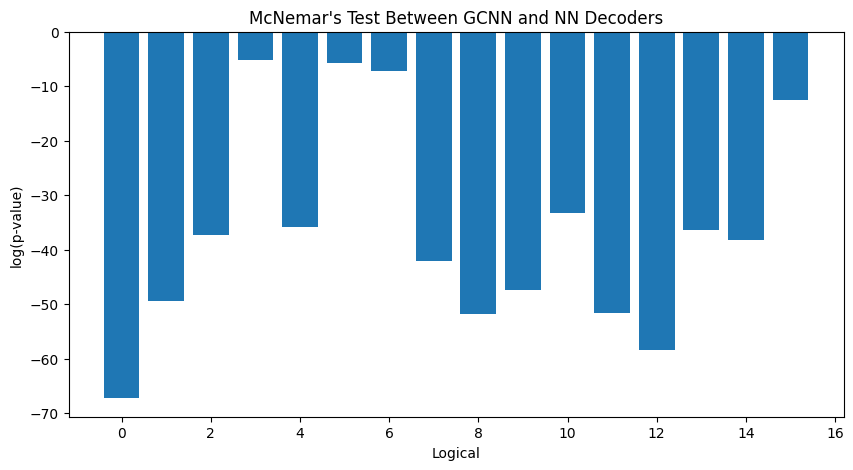

In [84]:
pvals = []

for logical in range(16):
    truth_binary = np.array([1 if x == logical else 0 for x in truth])
    al_binary = np.array([1 if x == logical else 0 for x in AL_preds])
    nn_binary = np.array([1 if x == logical else 0 for x in NN_preds])
    gc_binary = np.array([1 if x == logical else 0 for x in GC_preds])

    al_success = al_binary == truth_binary
    nn_success = nn_binary == truth_binary
    gc_success = gc_binary == truth_binary

    n00 = np.sum(np.logical_and(np.logical_not(nn_success), np.logical_not(gc_success)))
    n01 = np.sum(np.logical_and(np.logical_not(nn_success), gc_success))
    n10 = np.sum(np.logical_and(nn_success, np.logical_not(gc_success)))
    n11 = np.sum(np.logical_and(nn_success, gc_success))

    table = np.array([[n00, n01], [n10, n11]])

    # perform mcnemar's test


    # Import library 
    from statsmodels.stats.contingency_tables import mcnemar 


    # McNemar's Test without any continuity correction 
    result = mcnemar(table, exact=False, correction=False)

    pvals.append(result.pvalue)

print(pvals)

# plot pvales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(16), np.log(pvals))
plt.xlabel('Logical')
plt.ylabel('log(p-value)')
plt.title('McNemar\'s Test Between GCNN and NN Decoders')
plt.show()



## Chi2

In [85]:
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency

# contingency table
al_cm = confusion_matrix(truth, AL_preds)
al_pred_count = al_cm.sum(axis=0)

gc_cm = confusion_matrix(truth, GC_preds)
gc_pred_count = gc_cm.sum(axis=0)

nn_cm = confusion_matrix(truth, NN_preds)
nn_pred_count = nn_cm.sum(axis=0)



In [86]:
contingency_table = np.hstack((al_cm.T, gc_cm.T, nn_cm.T))

#display(contingency_table)


In [87]:
# calculate Cochran's Q test
stat, p, dof, expected = chi2_contingency(contingency_table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=63819.112, p=0.000


## Cochran Q

## F1 Analysis

In [88]:
import numpy as np

code_dist = 5
error_div = 1

gc_strings = []
with open(f'gc/scores/f1_{code_dist}_{error_div}.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        gc_strings.append(line.strip())

gc_scores = []
for array in gc_strings:
    # strip brackets and split by comma
    array = array[1:-1].split(', ')
    # convert to float
    array = [float(x) for x in array]
    gc_scores.append(array)

gc_scores = np.array(gc_scores)

# avarage over axis 0
gc_avg = np.mean(gc_scores, axis=0)
gc_big_avg = np.mean(gc_avg)


nn_strings = []
with open(f'nn/scores/f1_{code_dist}_{error_div}.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        nn_strings.append(line.strip())

nn_scores = []
for array in nn_strings:
    # strip brackets and split by comma
    array = array[1:-1].split(', ')
    # convert to float
    array = [float(x) for x in array]
    nn_scores.append(array)

nn_scores = np.array(nn_scores)

# avarage over axis 0
nn_avg = np.mean(nn_scores, axis=0)
nn_big_avg = np.mean(nn_avg)

al_strings = []
with open(f'al/scores/f1_{code_dist}_{error_div}.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        al_strings.append(line.strip())

al_scores = []

for array in al_strings:
    # strip brackets and split by comma
    array = array[1:-1].split(', ')
    # convert to float
    array = [float(x) for x in array]
    al_scores.append(array)

al_scores = np.array(al_scores)

# avarage over axis 0
al_avg = np.mean(al_scores, axis=0)

al_big_avg = np.mean(al_avg)

print(gc_big_avg, nn_big_avg, al_big_avg)

0.1827209705221806 0.2532391134634186 0.5243436075003909
